In [14]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


def fitness(x):
    f1 = 100 * (x[0]**2 + x[1]**2)
    f2 = (x[0]-1)**2 + x[1]**2
    # print(1)
    return [f1, f2]

class CustomizedProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=14,
                         n_obj=2,
                         xl=0,
                         xu=1)

    def _evaluate(self, x, out, *args, **kwargs):
        result = fitness(x)

        out['F'] = result


In [15]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize


problem = CustomizedProblem()
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)
termination = get_termination("n_gen", 40)

res = minimize(problem,
    algorithm,
    termination,
    seed=1,
    save_history=True,
    verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      9 |             - |             -
     2 |       50 |     11 |  0.0068455228 |         ideal
     3 |       60 |     12 |  0.000000E+00 |             f
     4 |       70 |     14 |  0.0190927589 |         ideal
     5 |       80 |     18 |  0.0006109631 |             f
     6 |       90 |     21 |  0.0022834945 |             f
     7 |      100 |     26 |  0.0070370270 |             f
     8 |      110 |     27 |  0.0016376880 |             f
     9 |      120 |     25 |  0.0036039084 |             f
    10 |      130 |     28 |  0.0035291454 |         ideal
    11 |      140 |     31 |  0.0032418057 |             f
    12 |      150 |     32 |  0.0494349421 |         nadir
    13 |      160 |     34 |  0.0033466791 |             f
    14 |      170 |     33 |  0.0078053627 |         ideal
    15 |      180 |     34 |  0.0002497594 |             f
    16 |      190 |     36 |  0.0067615707 |         ide

In [17]:
res.X.shape

(40, 14)

In [20]:
res.F

array([[8.13945281e-02, 9.85540892e-01],
       [9.41069457e+01, 1.74486253e-03],
       [2.70468838e+01, 2.31229856e-01],
       [1.39396795e+01, 3.93084771e-01],
       [5.07665230e+00, 6.23338776e-01],
       [7.43777147e+00, 5.31282270e-01],
       [1.96703847e+01, 3.11049952e-01],
       [3.94525114e+01, 1.38397695e-01],
       [1.96425226e+01, 3.11400742e-01],
       [5.94343404e+01, 5.82466262e-02],
       [4.77925612e+01, 9.60413277e-02],
       [8.91680423e+00, 4.94505279e-01],
       [5.39562151e+01, 7.66904238e-02],
       [6.43332125e+01, 4.45631241e-02],
       [1.09421235e+01, 4.48899914e-01],
       [1.70748167e+00, 7.58493586e-01],
       [3.50538125e+00, 6.62568291e-01],
       [8.04853110e+01, 1.56203991e-02],
       [8.95525173e-01, 8.23151108e-01],
       [1.26061149e+01, 4.27222137e-01],
       [3.53402785e+01, 1.65720746e-01],
       [1.03705921e-01, 9.53767631e-01],
       [7.43849137e+01, 1.93402624e-02],
       [2.94373736e+01, 2.09924057e-01],
       [6.943237

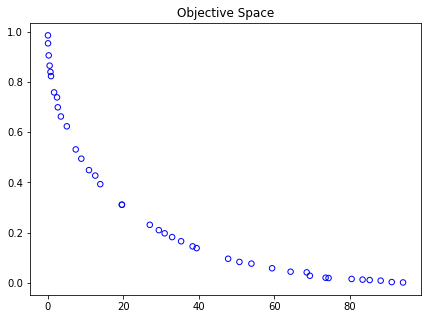

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()